# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
#make data
x_1 = np.linspace(start = -3, stop = 3, num = 500)
# x_1 = np.linspace(-3,3,10)//this can be written in this way too
# x_1

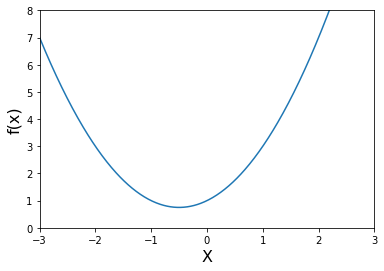

In [4]:
#plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivative
Challenge : Create a python function for the derivative of $f(x)$ called $df(x)$

In [5]:
def df(x):
    return 2*x + 1

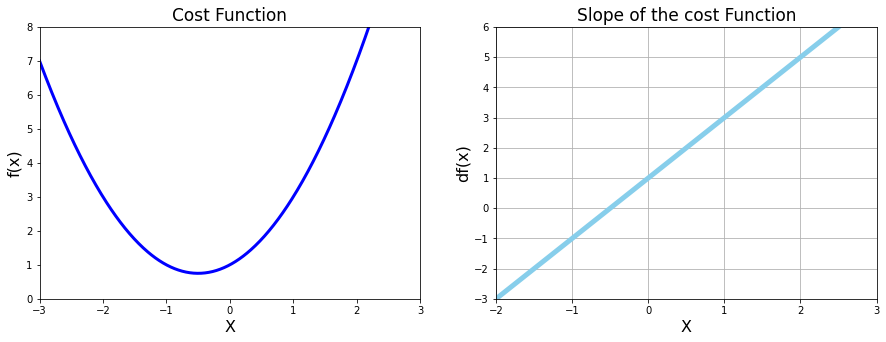

In [6]:
#plot function and derivative side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1), color='blue', linewidth = 3)

#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('df(x)', fontsize = 16)
plt.plot(x_1,df(x_1),color='skyblue', linewidth = 5)

plt.show()

## Python Loops & Gradient Descent


In [7]:
# python for loop
for counter in range(5):
    print('Hello World', counter)
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [8]:
# python while loop
counter  = 0
while(counter<5):
    print('Counting...',counter)
    counter = counter + 1
print('Ready or not, here I come!')    

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Ready or not, here I come!


In [9]:
# Gradient Descent 
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x) 
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
#     print(step_size)


    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('local minimum occurs at: ',new_x)
print('slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ',f(new_x))

Loop ran this many times: 50
local minimum occurs at:  -0.49996003706460423
slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


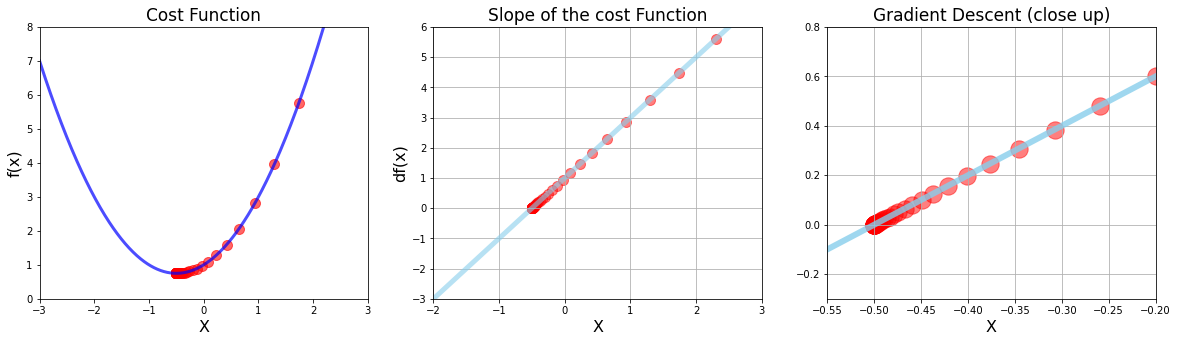

In [10]:
#superimpose the gradient descent calculations on plot

plt.figure(figsize = [20,5])

# 1 Chart: Cost Function
plt.subplot(1,3,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1), color='blue', linewidth = 3,alpha=0.7)

values = np.array(x_list) # the reason of writing this line is , function only run with array not with lits, (f(x_list) is a list)
plt.scatter(x_list, f(values), color='red', s = 100, alpha = 0.6)

#2 Chart: Derivative
plt.subplot(1,3,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('df(x)', fontsize = 16)
plt.plot(x_1,df(x_1),color='skyblue', linewidth = 5,alpha=0.6)

plt.scatter(x_list, slope_list, color='red', s=100,alpha=0.5)


#2 Chart: Derivative (close up)
plt.subplot(1,3,3)
plt.xlim([-0.55,-0.2])
plt.ylim([-0.3,0.8])
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue', linewidth = 6,alpha=0.8)

plt.scatter(x_list, slope_list, color='red', s=300,alpha=0.5)

plt.show()

# Example 2 - Multiple minima vs initial Guess & Advanced function 

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# make some data
x_2 = np.linspace(-2,2,1000)

# challenge: Write the g(x) function and the dg(x) function in python?
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

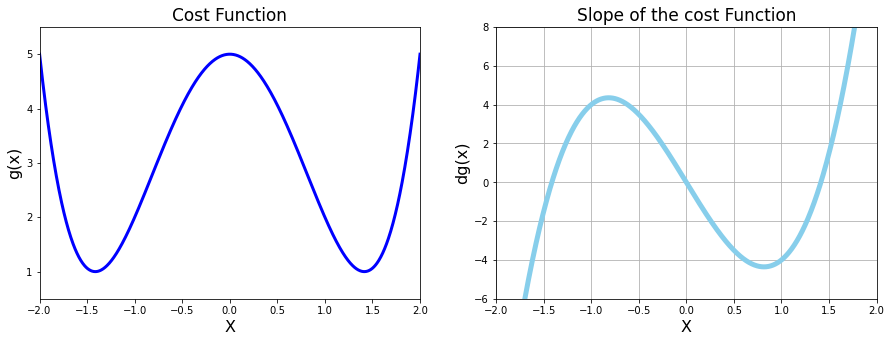

In [12]:
#plot function and derivative side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2, g(x_2), color='blue', linewidth = 3)

#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('dg(x)', fontsize = 16)
plt.plot(x_2,dg(x_2),color='skyblue', linewidth = 5)

plt.show()

# Gradient Descent as a Python Function

In [24]:
def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001,max_iter=300):
    
    
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x) 
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
    #     print(step_size)


        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    
    
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.5, multiplier = 0.01, precision = 0.0001)
print('Local Min occurs at : ', local_min)
print('Number of steps: ', len(list_x))

Local Min occurs at :  -1.4137636556157256
Number of steps:  56


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.1)
print('Local Min occurs at : ', local_min)
print('Number of steps: ', len(list_x))

Local Min occurs at :  -1.4120887490901561
Number of steps:  34


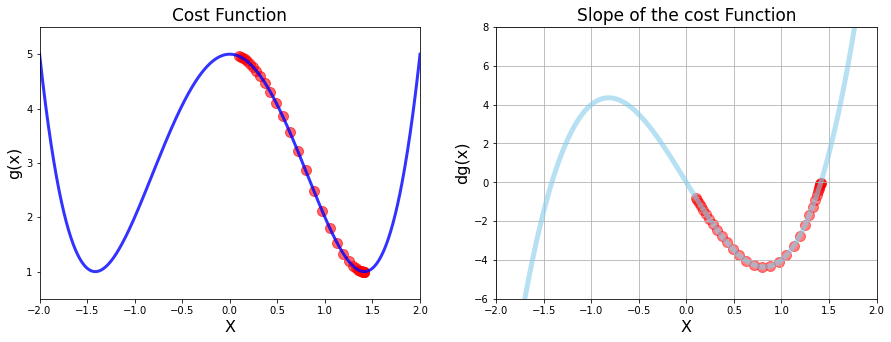

In [16]:
# calling gradient Descent 
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.1)
#plot function and derivative and scatter plot  side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2, g(x_2), color='blue', linewidth = 3,alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
            


#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('dg(x)', fontsize = 16)
plt.plot(x_2,dg(x_2),color='skyblue', linewidth = 5,alpha = 0.6)
plt.scatter(list_x,deriv_list,color='red', s=100, alpha = 0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [17]:
#make data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

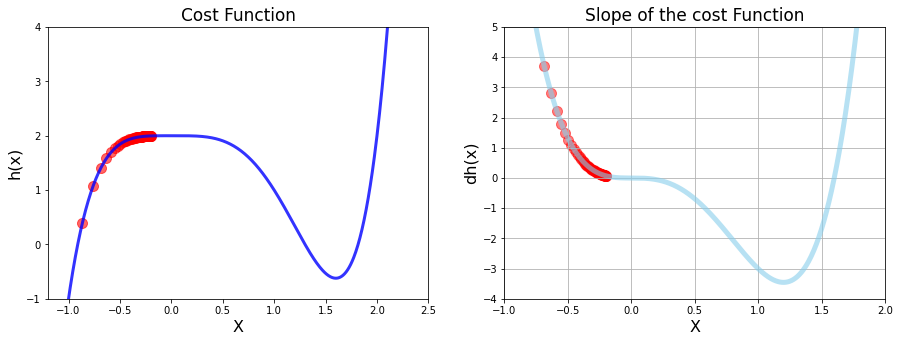

Local min occurs at:  -2071072.4470816324
Cost at which minimum is:  -3.810455326061589e+31
Number of steps:  71


In [18]:
# calling gradient Descent 
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2,max_iter = 70)
#plot function and derivative and scatter plot  side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)
plt.plot(x_3, h(x_3), color='blue', linewidth = 3,alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)
            


#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-1,2])
plt.ylim([-4,5])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('dh(x)', fontsize = 16)
plt.plot(x_3,dh(x_3),color='skyblue', linewidth = 5,alpha = 0.6)
plt.scatter(list_x,deriv_list,color='red', s=100, alpha = 0.5)

plt.show()

print('Local min occurs at: ',local_min)
print('Cost at which minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [19]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples


In [23]:
# Creating a Tuples - tuples packing
breakfest = 'bacon', 'eggs', 'avacado'
unlucky_numbers = 13, 4, 9, 36, 17

#How to access a value in a tuple
print('I Looove ', breakfest[0])
print('My hotel has no '+ str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinite loop', 'Cupertino', 95014      # tuples contains heteroGeneous data, arraylist of java
# breakfest[0] = 'Sausage',   tuples are immutable

tuple_with_single_value = 42,
type(tuple_with_single_value)

main, side, greens = breakfest
print('main course is ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is ',h(data_tuple[0]))
print('Number of Steps is', len(data_tuple[1]))

I Looove  bacon
My hotel has no 4th floor
main course is  bacon
Local min is 1.5989534547394717
Cost at the last x value is  -0.6214287992331258
Number of Steps is 117
